# this is a notebook just for testing

In [1]:
from platform import python_version
print(python_version())

3.8.10


In [11]:
#show info
!ffprobe -hide_banner test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m -show_entries format:stream -print_format json

{
Input #0, yuv4mpegpipe, from 'test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m':
  Duration: 00:00:19.02, start: 0.000000, bitrate: 994335 kb/s
  Stream #0:0: Video: rawvideo (Y42B / 0x42323459), yuv422p(progressive), 1920x1080, SAR 1:1 DAR 16:9, 29.97 fps, 29.97 tbr, 29.97 tbn
    "programs": [

    ],
    "streams": [
        {
            "index": 0,
            "codec_name": "rawvideo",
            "codec_long_name": "raw video",
            "codec_type": "video",
            "codec_tag_string": "Y42B",
            "codec_tag": "0x42323459",
            "width": 1920,
            "height": 1080,
            "coded_width": 1920,
            "coded_height": 1080,
            "closed_captions": 0,
            "film_grain": 0,
            "has_b_frames": 0,
            "sample_aspect_ratio": "1:1",
            "display_aspect_ratio": "16:9",
            "pix_fmt": "yuv422p",
            "level": -99,
            "field_order": "progressive",
            "refs": 1,
            "r_fra

In [19]:
!ffprobe -hide_banner test_vids/encoded/smithyAVC_1280_cf23.mp4

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'test_vids/encoded/smithyAVC_1280_cf23.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.29.100
  Duration: 00:00:30.00, start: 0.000000, bitrate: 3682 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1280x720, 3677 kb/s, 50 fps, 50 tbr, 12800 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]


[1920  1080; 1536  864; 1216  684; 960  540; 768  432; 608  342; 480  270; 384  216; 320  180; 256  144]

In [ ]:
!ffplay -f rawvideo -video_size 640x360 test_vids/downsampled/smithy_640.yuv

In [3]:
import subprocess
import json
command="ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json test_vids/encoded/smithyHEVC_cf34.mp4"
cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
dict = json.loads(cout)  # Convert data from JSON string to dictionary
print(dict)

{'programs': [], 'streams': [{'index': 0, 'codec_name': 'hevc', 'codec_long_name': 'H.265 / HEVC (High Efficiency Video Coding)', 'profile': 'Main', 'codec_type': 'video', 'codec_tag_string': 'hev1', 'codec_tag': '0x31766568', 'width': 3840, 'height': 2160, 'coded_width': 3840, 'coded_height': 2160, 'closed_captions': 0, 'film_grain': 0, 'has_b_frames': 2, 'pix_fmt': 'yuv420p', 'level': 153, 'color_range': 'tv', 'chroma_location': 'left', 'field_order': 'progressive', 'refs': 1, 'id': '0x1', 'r_frame_rate': '50/1', 'avg_frame_rate': '50/1', 'time_base': '1/12800', 'start_pts': 0, 'start_time': '0.000000', 'duration_ts': 384000, 'duration': '30.000000', 'bit_rate': '5591491', 'nb_frames': '1500', 'extradata_size': 2202, 'disposition': {'default': 1, 'dub': 0, 'original': 0, 'comment': 0, 'lyrics': 0, 'karaoke': 0, 'forced': 0, 'hearing_impaired': 0, 'visual_impaired': 0, 'clean_effects': 0, 'attached_pic': 0, 'timed_thumbnails': 0, 'captions': 0, 'descriptions': 0, 'metadata': 0, 'depen

[70 24 45  3 11]
[0.80168352 0.3389326  0.52103589 0.88479829 0.433684  ]


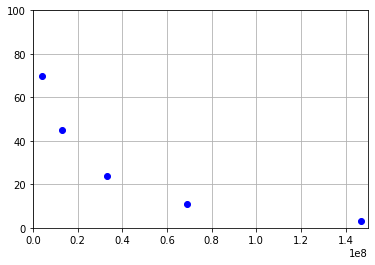

In [12]:
import numpy as np
import matplotlib.pyplot as pl

r = np.array([4000000,33000000,13000000,147000000,69000000])
q = np.array([30,76,55,97,89])
d = 100 - q
nr = np.linalg.norm(r)
nd = np.linalg.norm(d)
rz = r/nr
dz = d/nd
opt_rd = np.sqrt(np.add(rz**2, dz**2))
print(d)
print(opt_rd)
pl.plot(r, d, 'bo')
pl.xlim([0,150000000])
pl.ylim([0,100])
pl.grid(True)

In [6]:
import numpy as np
A = [[1,2,3],[3,3,3]]
print(np.einsum('ij->i', A)/3)

[2. 3.]


In [9]:
import numpy as np
A = np.zeros([4,52])
A[0] = np.arange(0,52,1)
print(A)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [32]:
import json
num_scenes = 3
opt_points = []
source_name = "testscene01"
rd_file = "rd_results/" + source_name + ".json"
with open(rd_file, 'r') as f:
    o_data = json.load(f)
    o_data["video_content"] = source_name
    template_opt = o_data["versions"][0]["shots"][0]["opt_points"][0]
    for i in range(0, num_scenes):
        opt_points.append(template_opt)
    print(opt_points)
    o_data["versions"][0]["shots"][0]["opt_points"] = opt_points
with open(rd_file, 'w') as w:
    json.dump(o_data, w, indent=5, separators=(',',': '))

[{'target': 0, 'crf': 0}, {'target': 0, 'crf': 0}, {'target': 0, 'crf': 0}]


In [28]:
import subprocess
c_seq = "ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -pix_fmt yuv420p test_vids/tempRAW_refs/test.yuv"
subprocess.call(c_seq, shell=True)

ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
  libavdevice    59.  6.100 / 59.  6.100
  libavfilter     8. 33.100 /  8. 33.100
  libswscale      6.  6.100 /  6.  6.100
  libswresample   4.  6.100 /  4.  6.100
  libpostproc    56.  5.100 / 56.  5.100

0

In [41]:
flag_target = False
target_quality = [0]
target_bitrate = [0,0]
print(lambda flag_target: len(target_quality) if flag_target else len(target_bitrate))
print(y(flag_target))

<function <lambda> at 0x7fdcde01e5e0>
2


In [42]:
PARAM_AVC = {"starting_range": [17,28], "lib": "libx264", "container": "mp4", "add_param": ""}
print(PARAM_AVC.starting_range)

AttributeError: 'dict' object has no attribute 'starting_range'

In [72]:
import numpy as np
import math
A = [1.,2.,1.,0.,-1.,3.,3.]
B = np.asarray(A)
min1 = np.argmin(B)
print(min1)
C = B.copy()
C[min1] = np.inf
print(C)
min2 = np.argmin(C)
print(min2)

4
[ 1.  2.  1.  0. inf  3.  3.]
3


In [57]:
a = 40
for i in range(23, 0, -1):
    a -= 1
    print(a)

39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17


In [77]:
a = (96.7 - 95.8)
print(str(a))

0.9000000000000057


In [5]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()
print(file_path)

/home/ubuntu/video_dynopt/test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m


In [11]:
import os
print(os.path.basename(file_path).split('.')[0])

rush_field_cuts_1080p


In [25]:
import subprocess
import json
start_t = 0.0
i_duration = 0.0
tot_duration = 0.0
det = f"ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
    -filter_complex:v \"select='gt(scene,0.3)',metadata=print:file=shot_detection.log\" -f null -"
subprocess.call(det, shell=True)
info = "ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m"
cout = subprocess.run(info.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
dict = json.loads(cout)
tot_duration= dict['format']['duration']
with open("shot_detection.log", 'r') as r:
    tm_log = r.read().splitlines()[::2]
tm_log.append("end pts_time:" + str(tot_duration))
num_scenes = len(tm_log)
for i,l in enumerate(tm_log):
    end_t = l.split("pts_time:",1)[1]
    print(str(start_t) + " - " + str(end_t))
    cut = f"ffmpeg -ss {start_t} -to {end_t} -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -pix_fmt yuv420p test_vids/tempRAW_refs/scene{str(i+1).zfill(7)}.yuv"
    subprocess.call(cut, shell=True)
    start_t = end_t


ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
  libavdevice    59.  6.100 / 59.  6.100
  libavfilter     8. 33.100 /  8. 33.100
  libswscale      6.  6.100 /  6.  6.100
  libswresample   4.  6.100 /  4.  6.100
  libpostproc    56.  5.100 / 56.  5.100

0.0 - 10.6106


ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
  libavdevice    59.  6.100 / 59.  6.100
  libavfilter     8. 33.100 /  8. 33.100
  libswscale      6.  6.100 /  6.  6.100
  libswresample   4.  6.100 /  4.  6.100
  libpostproc    56.  5.100 / 56.  5.100

10.6106 - 12.6126


frame=   60 fps=0.0 q=-0.0 Lsize=  182250kB time=00:00:02.00 bitrate=745750.2kbits/s speed=9.46x    
video:182250kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000000%
ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
 

12.6126 - 16.016


frame=  102 fps=0.0 q=-0.0 Lsize=  309825kB time=00:00:03.40 bitrate=745750.2kbits/s speed=10.5x    
video:309825kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000000%
ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
 

16.016 - 19.019000


frame=   90 fps=0.0 q=-0.0 Lsize=  273375kB time=00:00:03.00 bitrate=745750.2kbits/s speed=9.18x    
video:273375kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.000000%


In [35]:
REF_PATH = "test_vids/tempRAW_refs/" #raw files for each shot
for f in os.listdir(REF_PATH):
    print(f)
[os.remove(REF_PATH+f) for f in os.listdir(REF_PATH)] #clean temp_refs folder

scene0000003.yuv
scene0000004.yuv
scene0000001.yuv
scene0000002.yuv


[None, None, None, None]

In [ ]:
shutil.rmtree(path)